In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import src.data.request_water_depth as request_water_depth
import src.data.water_depth as water_depth
import src.visualization.period_plot as period_plot

In [2]:
data_depth = water_depth.get()

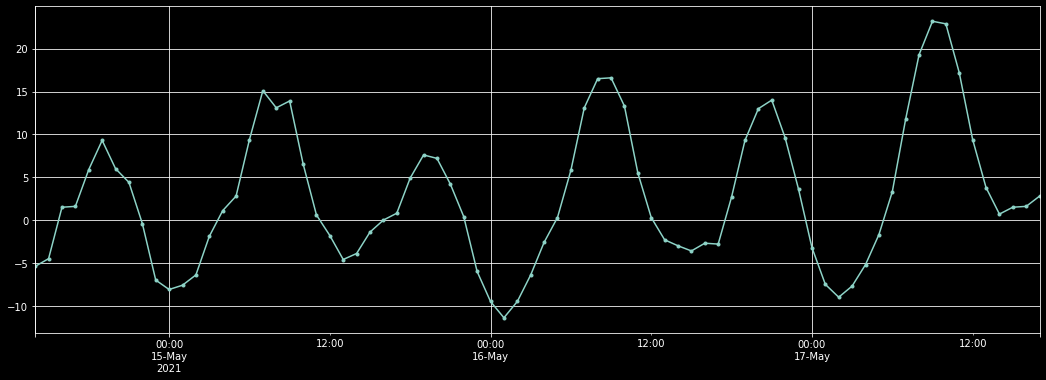

In [3]:
fig,ax=plt.subplots()
fig.set_size_inches(18,6)
data_depth.plot(style='.-', ax=ax)
ax.grid()

In [4]:
periods = data_depth[::12]

In [5]:
df_depth = pd.DataFrame(index=data_depth.index)
df_depth['depth'] = data_depth 

In [6]:
df_depth.loc[periods.index,'period'] = np.arange(len(periods))
df_depth.fillna(method='ffill', inplace=True)

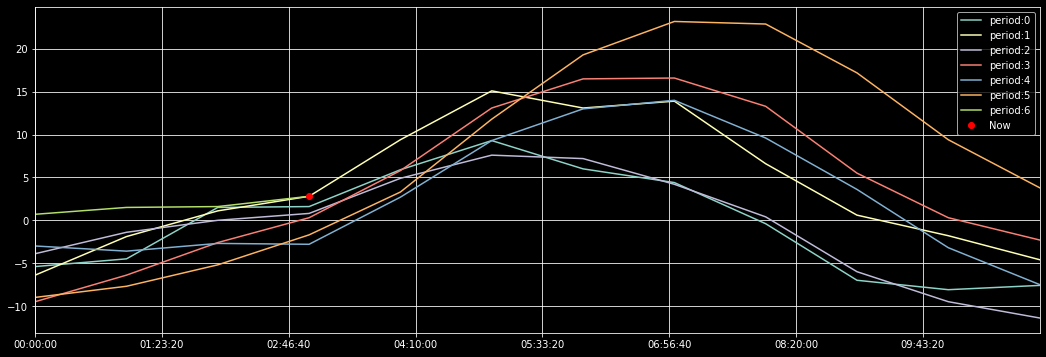

In [8]:
period_plot.plot()